In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

标准期限说明,0d,10y,15y,1m,1y,20y,2m,2y,30y,3m,3y,40y,50y,5y,6m,7y,9m
日期,,,,,,,,,,,,,,,,,
2024-01-02,1.4604,2.5601,2.6856,1.7412,2.1166,2.7401,1.8000,2.2462,2.8422,1.8057,2.3420,2.9186,2.9250,2.4374,2.0820,2.5600,2.0831
2024-01-03,1.4804,2.5531,2.6831,1.7512,2.1416,2.7420,1.8000,2.2558,2.8402,1.8091,2.3381,2.9189,2.9275,2.4212,2.0998,2.5452,2.0908
2024-01-04,1.5404,2.5368,2.6684,1.8012,2.1541,2.7290,1.8460,2.2554,2.8170,1.8406,2.3269,2.9010,2.9150,2.4089,2.1212,2.5350,2.1250
2024-01-05,1.5204,2.5175,2.6550,1.8082,2.1091,2.7215,1.8499,2.2369,2.8043,1.8025,2.2931,2.8872,2.9000,2.3903,2.0815,2.5175,2.0850
2024-01-08,1.5204,2.5136,2.6508,1.7999,2.1191,2.7170,1.8000,2.2558,2.8020,1.8125,2.3083,2.8872,2.9000,2.4080,2.0682,2.5175,2.0888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,0.4781,1.7365,1.9429,0.4927,0.9907,2.0648,0.7629,1.0814,2.0070,0.7819,1.1042,2.0537,2.0838,1.4591,0.9497,1.6601,0.9156
2024-12-26,0.5584,1.7122,1.9132,0.6035,1.0157,2.0298,0.8020,1.1000,1.9701,0.8029,1.1409,2.0302,2.0738,1.4370,0.9601,1.6251,0.9606
2024-12-27,0.5584,1.6929,1.8861,0.5646,1.0393,1.9948,0.8085,1.1320,1.9476,0.8205,1.1531,2.0058,2.0475,1.4059,0.9680,1.5930,0.9956


In [29]:
data = pd.read_excel('中债国债收益率曲线标准期限2002_2024.xlsx')
df = data.set_index(['日期','标准期限说明']).unstack(level=1)['收益率(%)'][data['标准期限说明'].unique()]
# df['日期'] = pd.to_datetime(df['日期'])
# df = df.sort_values(by='日期') # 确保时间序列顺序正确
# df = df.set_index('日期')
yields = df.copy() # 收益率数据 (Y)
yields = yields / 100 # 转换为小数形式

array([ 0.  ,  0.08,  0.17,  0.25,  0.5 ,  0.75,  1.  ,  2.  ,  3.  ,
        5.  ,  7.  , 10.  , 15.  , 20.  , 30.  , 40.  , 50.  ])

In [38]:


# 期限（以年为单位）
tenors = data['标准期限(年)'].unique()

# --- 方法一：对收益率变动 (ΔY) 应用 PCA ---
print("--- 方法一: 对收益率变动 (ΔY) 应用 PCA ---")
# 1. 计算日变动（差分）
yield_changes = yields.diff().dropna()

# 2. 应用 PCA
pca_yield = PCA(n_components=3)
pca_yield.fit(yield_changes)

# 3. 结果分析
explained_variance_ratio_yield = pca_yield.explained_variance_ratio_
print("解释的方差比例 (ΔY):", explained_variance_ratio_yield)
print("前三主成分累计解释方差:", explained_variance_ratio_yield.sum())

# 4. 主成分载荷 (特征向量)
loadings_yield = pd.DataFrame(pca_yield.components_, columns=yields.columns, index=['PC1 (Level)', 'PC2 (Slope)', 'PC3 (Curvature)'])
print("\n主成分载荷 (ΔY):\n")
display(loadings_yield.round(4).T)







--- 方法一: 对收益率变动 (ΔY) 应用 PCA ---
解释的方差比例 (ΔY): [0.44313634 0.25168256 0.09268041]
前三主成分累计解释方差: 0.7874993018379981

主成分载荷 (ΔY):



,PC1 (Level),PC2 (Slope),PC3 (Curvature)
标准期限说明,,,
0d,0.0678,0.5482,0.6345
1m,0.1617,0.5305,0.1557
2m,0.1704,0.3687,-0.2334
3m,0.1670,0.2979,-0.4224
6m,0.1456,0.1393,-0.2769
9m,0.2170,0.1058,-0.2639
1y,0.2559,0.0907,-0.2795
2y,0.2521,0.0178,-0.0623
3y,0.3074,0.0027,-0.0562


In [39]:
# --- 方法二：对零息票债券价格变动 (ΔP) 应用 PCA ---
print("\n--- 方法二: 对零息票债券价格变动 (ΔP) 应用 PCA ---")

# 1. 收益率转换为零息票债券价格（假设连续复利）
# P(T) = exp(-y(T) * T)
prices = pd.DataFrame(index=yields.index, columns=yields.columns)
for i, T in enumerate(tenors):
    prices.iloc[:, i] = np.exp(-yields.iloc[:, i] * T)

# 2. 计算价格的对数日回报（近似价格变动百分比）
# Log_Return = log(P_t) - log(P_{t-1})
log_returns = np.log(prices).diff().dropna()
# 或者直接使用价格的百分比变化 (P_t - P_{t-1}) / P_{t-1}

# 3. 应用 PCA
pca_price = PCA(n_components=3)
pca_price.fit(log_returns)

# 4. 结果分析
explained_variance_ratio_price = pca_price.explained_variance_ratio_
print("解释的方差比例 (ΔP):", explained_variance_ratio_price)
print("前三主成分累计解释方差:", explained_variance_ratio_price.sum())

# 5. 主成分载荷 (特征向量)
loadings_price = pd.DataFrame(pca_price.components_, columns=prices.columns, index=['PC1', 'PC2', 'PC3'])
print("\n主成分载荷 (ΔP):\n")
display(loadings_price.round(4).T)


--- 方法二: 对零息票债券价格变动 (ΔP) 应用 PCA ---
解释的方差比例 (ΔP): [0.9501169  0.02815038 0.00744266]
前三主成分累计解释方差: 0.9857099403492727

主成分载荷 (ΔP):



,PC1,PC2,PC3
标准期限说明,,,
0d,-0.0000,-0.0000,0.0000
1m,0.0001,0.0000,0.0005
2m,0.0003,-0.0011,-0.0010
3m,0.0006,-0.0021,0.0013
6m,0.0017,-0.0022,-0.0018
9m,0.0038,-0.0087,-0.0018
1y,0.0063,-0.0156,-0.0074
2y,0.0151,-0.0172,-0.0309
3y,0.0294,-0.0444,-0.0251


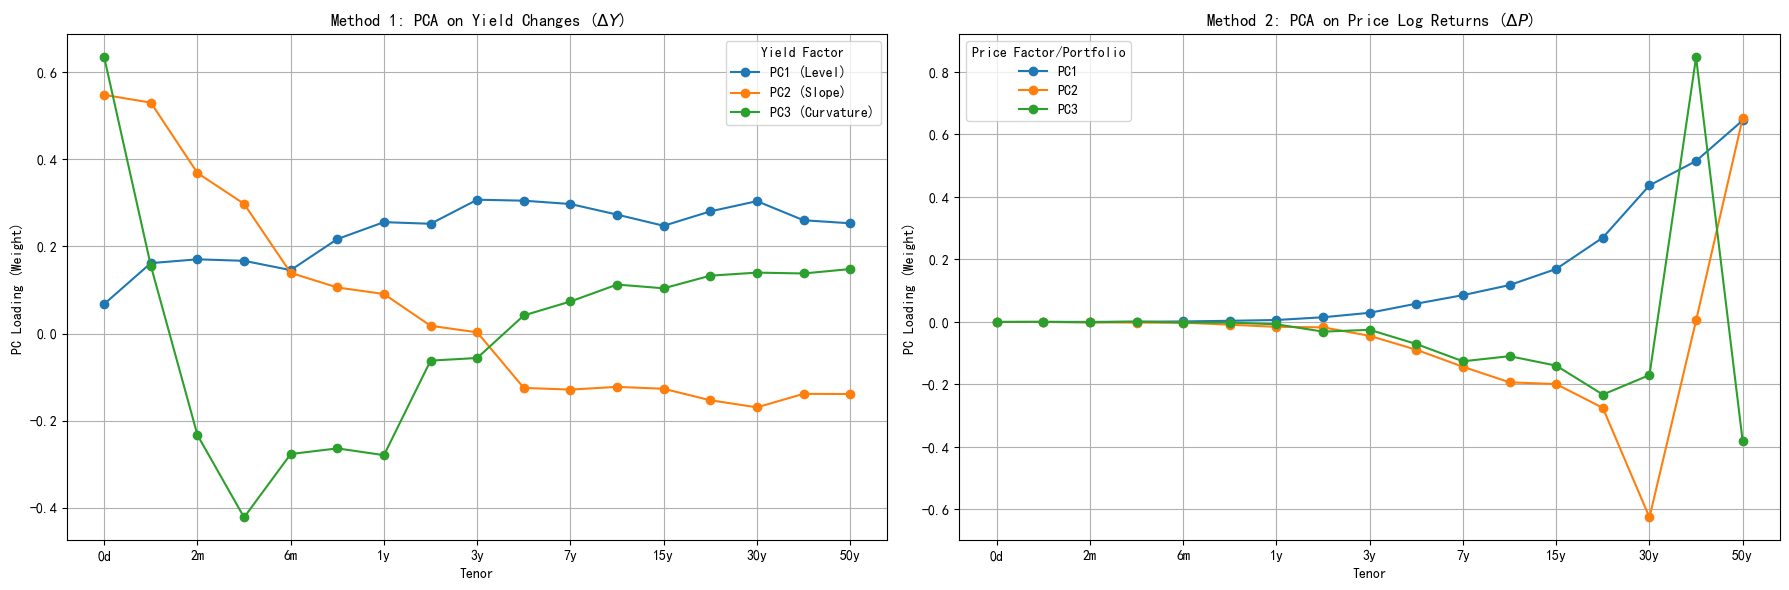


--- 差异对比 ---
方法一 (ΔY) 累计解释方差: 78.75%
方法二 (ΔP) 累计解释方差: 98.57%

载荷形状的主要差异:
PC1 (Level): 方法二的载荷在长期限上往往比方法一更高/更平坦。
这反映了长期债券价格对利率的敏感性更高（久期效应）。


In [37]:
# --- 结果可视化与比较 ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 可视化方法一的载荷
loadings_yield.T.plot(ax=axes[0], marker='o')
axes[0].set_title('Method 1: PCA on Yield Changes ($\\Delta Y$)')
axes[0].set_xlabel('Tenor')
axes[0].set_ylabel('PC Loading (Weight)')
axes[0].legend(title='Yield Factor')
axes[0].grid(True)

# 可视化方法二的载荷
loadings_price.T.plot(ax=axes[1], marker='o')
axes[1].set_title('Method 2: PCA on Price Log Returns ($\\Delta P$)')
axes[1].set_xlabel('Tenor')
axes[1].set_ylabel('PC Loading (Weight)')
axes[1].legend(title='Price Factor/Portfolio')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# --- 差异总结 ---
print("\n--- 差异对比 ---")
print("方法一 (ΔY) 累计解释方差: {:.2f}%".format(explained_variance_ratio_yield.sum() * 100))
print("方法二 (ΔP) 累计解释方差: {:.2f}%".format(explained_variance_ratio_price.sum() * 100))
print("\n载荷形状的主要差异:")
print("PC1 (Level): 方法二的载荷在长期限上往往比方法一更高/更平坦。")
print("这反映了长期债券价格对利率的敏感性更高（久期效应）。")

: 